In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

In [2]:
PAMP = pd.read_csv('./Data/Argentina - Pampa Energia SA (PAMP).csv')
BEEF = pd.read_csv('./Data/Brazil - Minerva SA_Brazil (BEEF3).csv')
CCB = pd.read_csv('./Data/Colombia - Cementos Argos SA (CCB).csv')
MNHD = pd.read_csv('./Data/Egypt - Medinet Nasr Housing (MNHD).csv')
SBER = pd.read_csv('./Data/Russia - Sberbank Rossii PAO (SBER).csv')
IMPJ = pd.read_csv('./Data/South Africa - Impala Platinum Holdings Ltd (IMPJ).csv')
DSMC = pd.read_csv('./Data/South Korea - Dongkuk Steel Mill Co Ltd (001230).csv')
KCHOL = pd.read_csv('./Data/Turkey - Koc Holding AS (KCHOL).csv')

In [3]:
PAMP

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",85.15,86.5,88.1,85.15,564.30K,-1.10%
1,"Mar 30, 2021",86.1,85.15,86.75,84.6,141.40K,1.29%
2,"Mar 29, 2021",85,80,86,79,371.22K,3.85%
3,"Mar 26, 2021",81.85,84,84.6,80.7,462.55K,-2.09%
4,"Mar 25, 2021",83.6,85.2,87.3,82.1,389.78K,-3.13%
...,...,...,...,...,...,...,...
296,"Jan 07, 2020",47.6,48.35,49,46.9,901.95K,-1.86%
297,"Jan 06, 2020",48.5,48.4,48.7,47,719.24K,-0.61%
298,"Jan 03, 2020",48.8,48.25,49.45,46.5,595.36K,1.14%
299,"Jan 02, 2020",48.25,49.35,50.2,47.55,878.50K,-2.92%


In [4]:
PAMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      301 non-null    object
 1   Price     301 non-null    object
 2   Open      301 non-null    object
 3   High      301 non-null    object
 4   Low       301 non-null    object
 5   Vol.      300 non-null    object
 6   Change %  300 non-null    object
dtypes: object(7)
memory usage: 16.6+ KB


In [5]:
## drop last row because it doesn't contain relevant information

PAMP.drop(300, inplace=True)

In [6]:
## change date column to datetime

PAMP['Date'] = pd.to_datetime(PAMP['Date'], format='%b %d, %Y')

In [7]:
## change price columns to integer

PAMP['Price'] = pd.to_numeric(PAMP['Price'])
PAMP['Open'] = pd.to_numeric(PAMP['Open'])
PAMP['High'] = pd.to_numeric(PAMP['High'])
PAMP['Low'] = pd.to_numeric(PAMP['Low'])

In [8]:
PAMP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      300 non-null    datetime64[ns]
 1   Price     300 non-null    float64       
 2   Open      300 non-null    float64       
 3   High      300 non-null    float64       
 4   Low       300 non-null    float64       
 5   Vol.      300 non-null    object        
 6   Change %  300 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 18.8+ KB


In [9]:
PAMP.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
PAMP

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,48.25,49.35,50.20,47.55,878.50K,-2.92%
1,2020-01-03,48.80,48.25,49.45,46.50,595.36K,1.14%
2,2020-01-06,48.50,48.40,48.70,47.00,719.24K,-0.61%
3,2020-01-07,47.60,48.35,49.00,46.90,901.95K,-1.86%
4,2020-01-08,46.50,47.50,47.50,46.00,1.18M,-2.31%
...,...,...,...,...,...,...,...
295,2021-03-25,83.60,85.20,87.30,82.10,389.78K,-3.13%
296,2021-03-26,81.85,84.00,84.60,80.70,462.55K,-2.09%
297,2021-03-29,85.00,80.00,86.00,79.00,371.22K,3.85%
298,2021-03-30,86.10,85.15,86.75,84.60,141.40K,1.29%


In [10]:
## find rows for 2021 data

PAMP.loc[PAMP['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
240,2021-01-04,76.70,76.90,78.10,76.00,463.28K,-0.26%
241,2021-01-05,78.30,76.65,78.90,76.20,500.06K,2.09%
242,2021-01-06,78.00,77.60,78.90,77.00,175.53K,-0.38%
243,2021-01-07,79.95,76.60,80.40,76.60,414.26K,2.50%
244,2021-01-08,79.00,79.45,79.90,76.30,836.37K,-1.19%
245,2021-01-11,75.50,76.70,77.20,73.80,251.45K,-4.43%
246,2021-01-12,76.00,74.55,78.00,73.20,436.60K,0.66%
247,2021-01-13,77.50,76.05,78.00,75.50,253.17K,1.97%
248,2021-01-14,77.00,78.00,78.50,75.80,741.08K,-0.65%
249,2021-01-15,78.10,77.10,78.10,75.40,353.31K,1.43%


In [11]:
## split training data and testing data, testing data will be the year of 2021

training_data = PAMP[['Date', 'Price']][:240]
testing_data = PAMP[['Date', 'Price']][240:]

## Daily

In [17]:
def get_train_data(data, window_size):
    
    X, y = [], []
    
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    
    return np.array(X), np.array(y)

In [20]:
def get_test_data(data, scaler, window_size):
    raw = data['Price'][len(data) - len(testing_data) - window_size:].values
    raw = raw.reshape(-1, 1)
    raw = scaler.transform(raw)
    
    X, y = [], []
    
    for i in range(window_size, raw.shape[0]):
        X.append(raw[i-window_size:i, 0])
        y.append(raw[i])
        
    X = np.array(X)
    y = np.array(y)
    
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    
    return X, y

In [16]:
# def get_test_data(data, scaler, window_size):
#     raw = data['Price'][len(data) - len(testing_data) - window_size:].values
#     raw = raw.reshape(-1, 1)
#     raw = scaler.transform(raw)
    
#     X_test = []
    
#     for i in range(window_size, raw.shape[0]):
#         X_test.append(raw[i-window_size:i, 0])
        
#     X_test = np.array(X_test)
    
#     X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
#     return X_test

In [21]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(PAMP[['Price']])
scaled_train_data = scaled_data[:240]
scaled_test_data = scaled_data[240:]

In [31]:
X_train, y_train = get_train_data(scaled_train_data, 10)
X_test, y_test = get_test_data(PAMP, scaler, 10)

In [25]:
inputs = tf.keras.Input(shape=(X_train.shape[1], 1))
x = layers.LSTM(units=50, return_sequences=True)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(units=50)(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable p

In [26]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(lr=.01, decay=0.01))

history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200


C:\Users\Chris\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 3s 10ms/step - loss: 0.0934
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0278
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0229
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0087
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0087
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0067
Epoch 8/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 10/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 11/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 12/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0061
Epoch 13/200
8/8 [==============================] - 0s 8ms/step - loss: 

8/8 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 105/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 106/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0034
Epoch 107/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 108/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 109/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 110/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 111/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 112/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 113/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 114/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0034
Epoch 115/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 116/200
8/8 [==============================] - 0

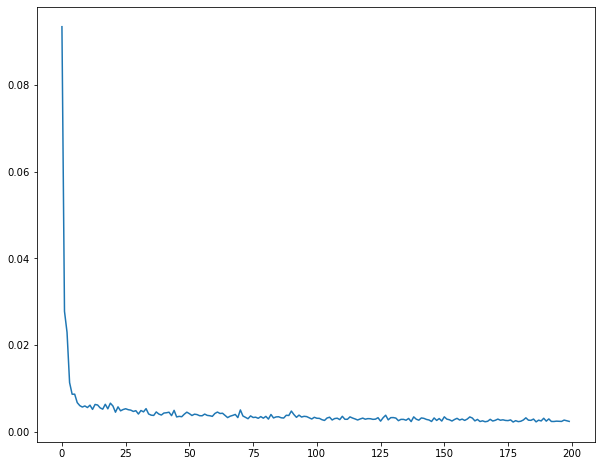

In [27]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='training loss')

In [28]:
y_test = []

for i in range(240, len(PAMP)):
    y_test.append(PAMP['Price'][i])
    
y_test = np.array(y_test)

In [37]:
y_test.reshape(-1, 1)

array([[0.78175313],
       [0.81037567],
       [0.80500894],
       [0.83989267],
       [0.82289803],
       [0.76028623],
       [0.76923077],
       [0.7960644 ],
       [0.78711986],
       [0.80679785],
       [0.7960644 ],
       [0.81932021],
       [0.84973166],
       [0.7745975 ],
       [0.74776386],
       [0.75134168],
       [0.84436494],
       [0.85152057],
       [0.89445438],
       [0.82289803],
       [0.85867621],
       [0.85152057],
       [0.84078712],
       [0.90608229],
       [0.92128801],
       [0.93023256],
       [0.9391771 ],
       [0.91949911],
       [0.89982111],
       [0.93381038],
       [0.99105546],
       [0.93738819],
       [0.9391771 ],
       [0.88550984],
       [0.86583184],
       [0.8765653 ],
       [0.82289803],
       [0.80143113],
       [0.84078712],
       [0.83184258],
       [0.82647585],
       [0.8765653 ],
       [0.88550984],
       [0.85330948],
       [0.8765653 ],
       [0.88550984],
       [0.91234347],
       [0.958

In [38]:
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
testing_data['Predicted_Price'] = pred_price

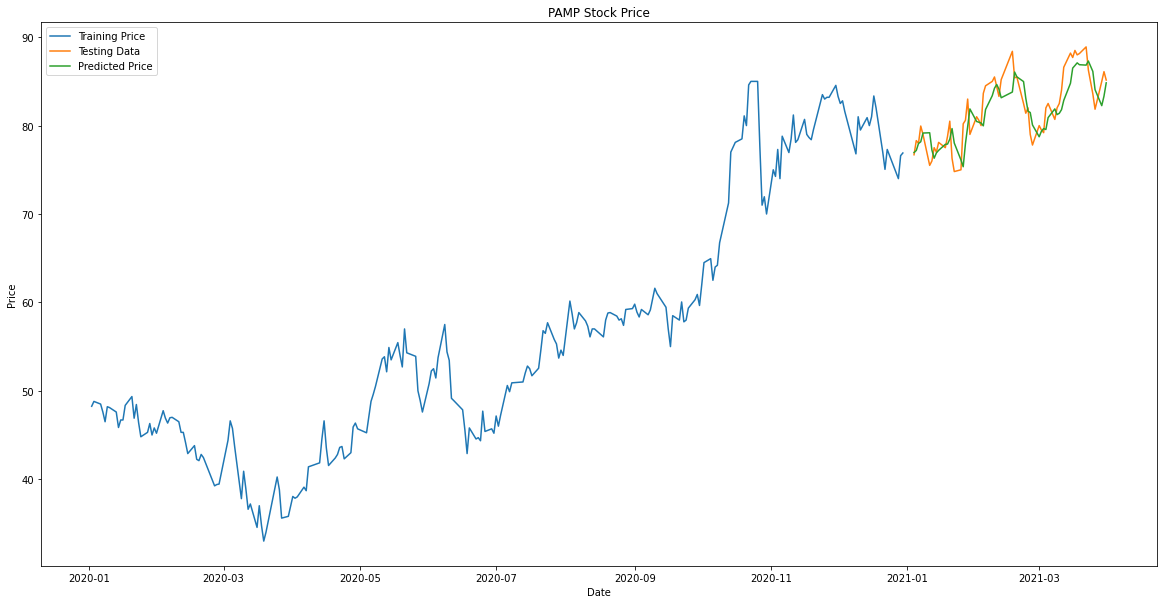

In [39]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

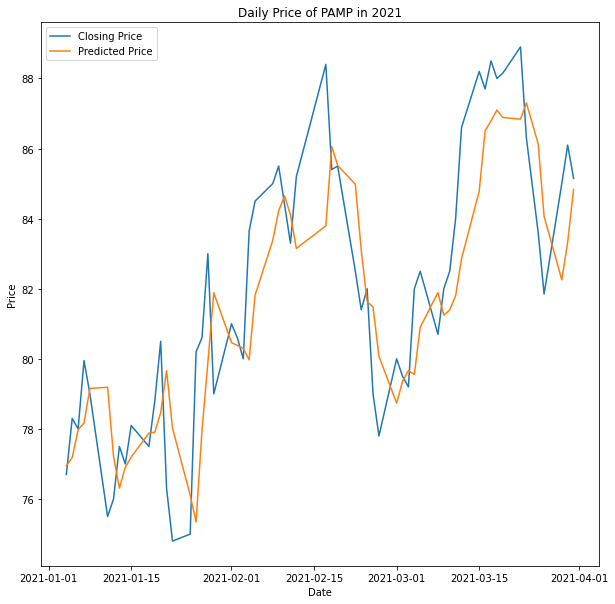

In [40]:
plt.figure(figsize=(10, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price of PAMP in 2021')
plt.legend()
plt.show()

In [214]:
def sma(data, window):
    
    sma = data.rolling(window=window).mean()
    
    return sma

In [215]:
def bollinger(data, sma, window):
    std = data.rolling(window=window).std()
    upper_bb = sma + std*2
    lower_bb = sma - std*2
    
    return upper_bb, lower_bb

In [219]:
PAMP['SMA'] = sma(PAMP['Price'], 20)
PAMP['upper_bb'], PAMP['lower_bb'] = bollinger(PAMP['Price'], PAMP['SMA'], 20)
PAMP

,Date,Price,Open,High,Low,Vol.,Change %,SMA,upper_bb,lower_bb
0,2020-01-02,48.25,49.35,50.20,47.55,878.50K,-2.92%,NaN,NaN,NaN
1,2020-01-03,48.80,48.25,49.45,46.50,595.36K,1.14%,NaN,NaN,NaN
2,2020-01-06,48.50,48.40,48.70,47.00,719.24K,-0.61%,NaN,NaN,NaN
3,2020-01-07,47.60,48.35,49.00,46.90,901.95K,-1.86%,NaN,NaN,NaN
4,2020-01-08,46.50,47.50,47.50,46.00,1.18M,-2.31%,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
295,2021-03-25,83.60,85.20,87.30,82.10,389.78K,-3.13%,83.7575,91.240342,76.274658
296,2021-03-26,81.85,84.00,84.60,80.70,462.55K,-2.09%,83.9000,91.104750,76.695250
297,2021-03-29,85.00,80.00,86.00,79.00,371.22K,3.85%,84.2600,90.876932,77.643068
298,2021-03-30,86.10,85.15,86.75,84.60,141.40K,1.29%,84.5650,90.911993,78.218007


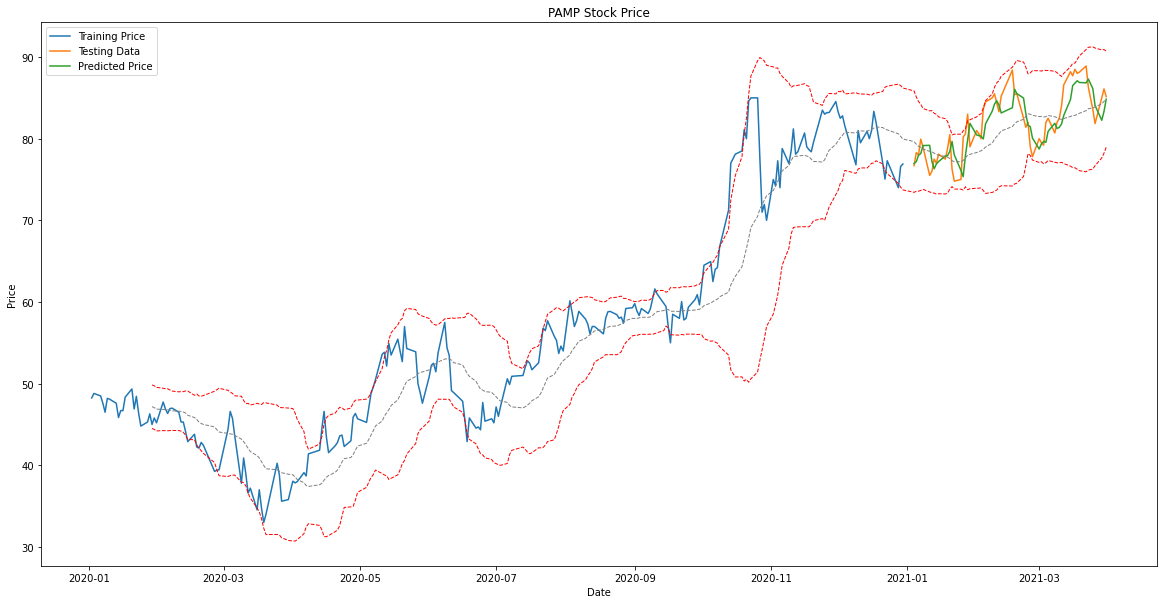

In [225]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.plot(PAMP['Date'], PAMP['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(PAMP['Date'], PAMP['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(PAMP['Date'], PAMP['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

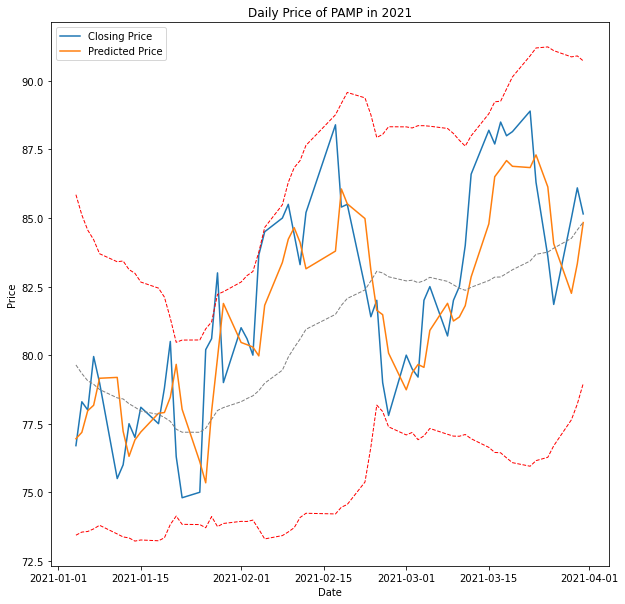

In [227]:
plt.figure(figsize=(10, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.plot(PAMP['Date'][240:], PAMP['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(PAMP['Date'][240:], PAMP['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(PAMP['Date'][240:], PAMP['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price of PAMP in 2021')
plt.legend()
plt.show()

## Weekly

In [197]:
def get_weekly_train_data(data, window_size):
    
    X, y = [], []
    
    for i in range(window_size, len(data), 5):
        X.append(data[i-window_size:i])
        y.append(data[i:i+5])
        
    X = np.array(X)
    y = np.array(y)
    
    y = np.reshape(y, (y.shape[0], y.shape[1]))    
    
    return X, y

In [198]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 10)

In [202]:
inputs = tf.keras.Input(shape=(X_train_w.shape[1], 1))
x = layers.LSTM(units=50, return_sequences=True)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(units=50)(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(5, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_4 (LSTM)               (None, 10, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 255       
                                                                 
Total params: 30,855
Trainable params: 30,855
Non-trainable

In [203]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(lr=.01, decay=0.01))

history = model.fit(X_train_w, y_train_w, epochs=200)

Epoch 1/200


C:\Users\Chris\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 3s 11ms/step - loss: 0.2066
Epoch 2/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0845
Epoch 3/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0296
Epoch 4/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0871
Epoch 5/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0734
Epoch 6/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0431
Epoch 7/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0344
Epoch 8/200
2/2 [==============================] - 0s 11ms/step - loss: 0.0315
Epoch 9/200
2/2 [==============================] - 0s 12ms/step - loss: 0.0290
Epoch 10/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 11/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0201
Epoch 12/200
2/2 [==============================] - 0s 11ms/step - loss: 0.0139
Epoch 13/200
2/2 [==============================] - 0s 11ms/s

2/2 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 104/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 105/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 106/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0080
Epoch 107/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 108/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 109/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0082
Epoch 110/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 111/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 112/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 113/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 114/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 115/200
2/2 [==============================

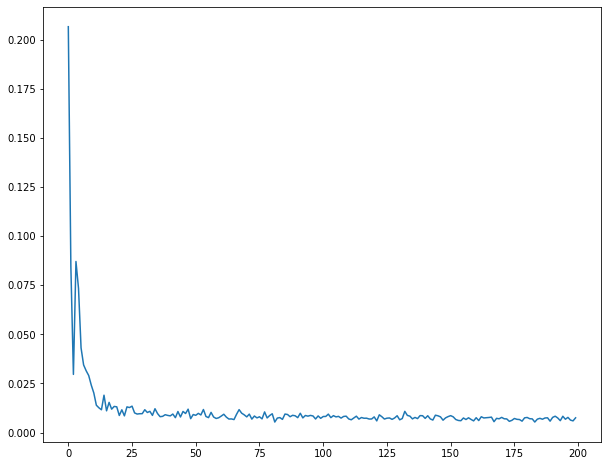

In [204]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='training loss')

In [205]:
def get_weekly_test_data(data, scaler, window_size):
    raw = data['Price'][len(data) - len(testing_data) - window_size:].values
    raw = raw.reshape(-1, 1)
    raw = scaler.transform(raw)
    
    X, y = [], []
    
    for i in range(window_size, raw.shape[0], 5):
        X.append(raw[i-window_size:i, 0])
        y.append(raw[i:i+5])
        
    X = np.array(X)
    y = np.array(y)
    
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    y = np.reshape(y, (y.shape[0], y.shape[1]))
    
    return X, y

In [206]:
X_test_w, y_test_w = get_weekly_test_data(PAMP, scaler, 10)

In [207]:
pred_price = model.predict(X_test_w)
pred_price = scaler.inverse_transform(pred_price)

train_pred_price = model.predict(X_train_w)
train_pred_price = scaler.inverse_transform(train_pred_price)

In [210]:
trainScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_train_w[:,:]), train_pred_price))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test_w[:,:]), pred_price))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.93 RMSE
Test Score: 3.32 RMSE


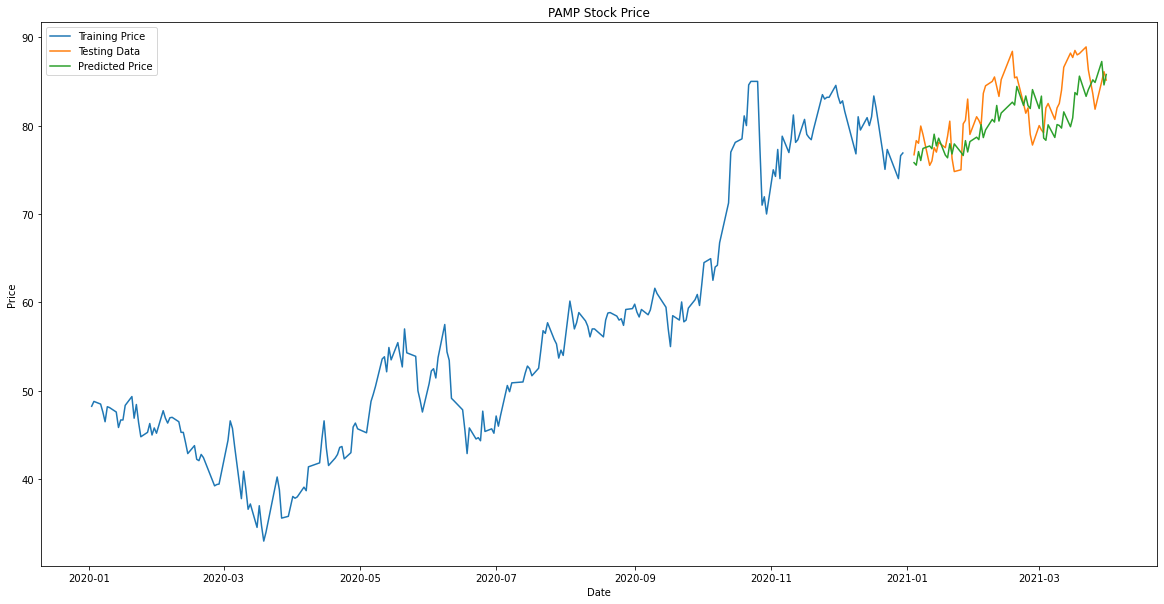

In [211]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], pred_price.flatten(), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

# Monthly

In [212]:
def get_monthly_train_data(data, window_size):
    
    X, y = [], []
    
    for i in range(window_size, len(data), 20):
        X.append(data[i-window_size:i])
        y.append(data[i:i+20])
        
    X = np.array(X)
    y = np.array(y)
    
    y = np.reshape(y, (y.shape[0], y.shape[1]))    
    
    return X, y

In [213]:
def get_monthly_test_data(data, scaler, window_size):
    raw = data['Price'][len(data) - len(testing_data) - window_size:].values
    raw = raw.reshape(-1, 1)
    raw = scaler.transform(raw)
    
    X, y = [], []
    
    for i in range(window_size, raw.shape[0], 20):
        X.append(raw[i-window_size:i, 0])
        y.append(raw[i:i+20])
        
    X = np.array(X)
    y = np.array(y)
    
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    y = np.reshape(y, (y.shape[0], y.shape[1]))
    
    return X, y

## PyTorch

In [52]:
import torch
import torch.nn as nn

In [53]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])

    data = np.array(data)
    test_set_size = 60
    train_set_size = data.shape[0] - (test_set_size)
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

In [54]:
price = PAMP[['Price']]
price['Price'] = scaler.transform(price['Price'].values.reshape(-1, 1))
price

C:\Users\Chris\AppData\Local\Temp/ipykernel_13628/3439380683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Price'] = scaler.transform(price['Price'].values.reshape(-1, 1))


,Price
0,0.272809
1,0.282648
2,0.277281
3,0.261181
4,0.241503
...,...
295,0.905188
296,0.873882
297,0.930233
298,0.949911


In [78]:
X_train, y_train, X_test, y_test = split_data(price, 14)

In [79]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [80]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [81]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)   
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [82]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [83]:
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [84]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.29455646872520447
Epoch  1 MSE:  0.13758298754692078
Epoch  2 MSE:  0.06043531373143196
Epoch  3 MSE:  0.08683304488658905
Epoch  4 MSE:  0.05248863995075226
Epoch  5 MSE:  0.06414603441953659
Epoch  6 MSE:  0.06720422208309174
Epoch  7 MSE:  0.058491066098213196
Epoch  8 MSE:  0.044208746403455734
Epoch  9 MSE:  0.03660830110311508
Epoch  10 MSE:  0.046962060034275055
Epoch  11 MSE:  0.034817494451999664
Epoch  12 MSE:  0.022743528708815575
Epoch  13 MSE:  0.02291717752814293
Epoch  14 MSE:  0.020055340602993965
Epoch  15 MSE:  0.009030220098793507
Epoch  16 MSE:  0.01933925971388817
Epoch  17 MSE:  0.014484829269349575
Epoch  18 MSE:  0.0104276267811656
Epoch  19 MSE:  0.013683055527508259
Epoch  20 MSE:  0.010774975642561913
Epoch  21 MSE:  0.005610330495983362
Epoch  22 MSE:  0.006259894464164972
Epoch  23 MSE:  0.009499510750174522
Epoch  24 MSE:  0.007712955586612225
Epoch  25 MSE:  0.00613179849460721
Epoch  26 MSE:  0.0073775132186710835
Epoch  27 MSE:  0.00820

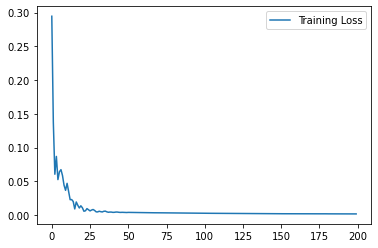

In [85]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [86]:
y_test = y_test.reshape(-1, 1)

In [87]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.26 RMSE
Test Score: 2.73 RMSE


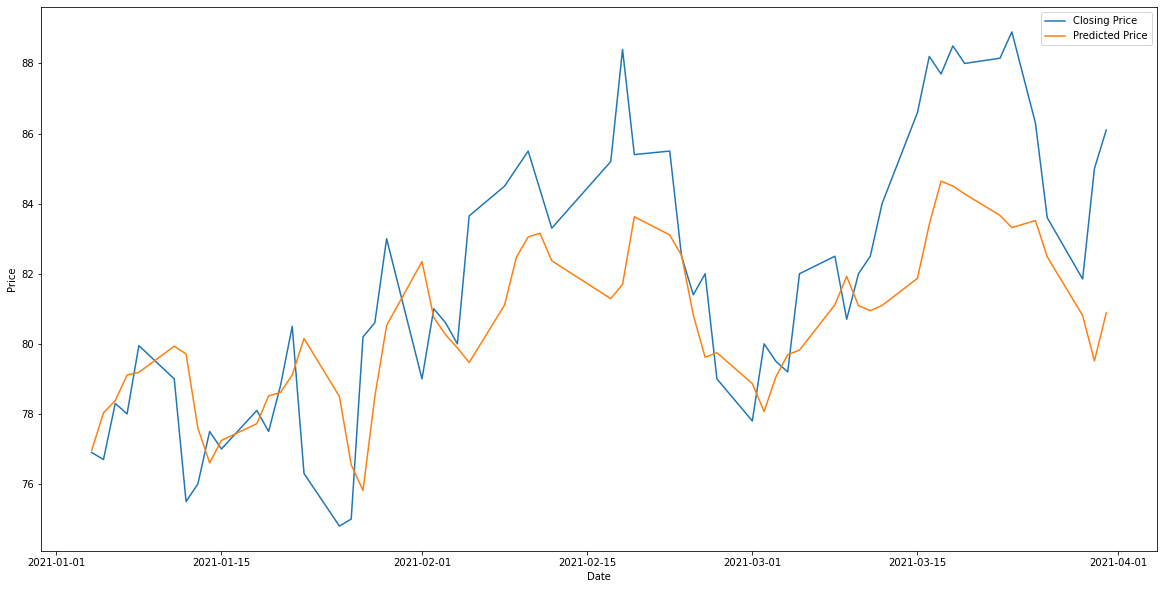

In [88]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Weekly

In [181]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [182]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 15)
X_test_w, y_test_w = get_weekly_test_data(PAMP, scaler, 15)

In [183]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [185]:
y_train_w = y_train_w.reshape(45, 5)

In [186]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.2822169065475464
Epoch  1 MSE:  0.19298160076141357
Epoch  2 MSE:  0.08939965069293976
Epoch  3 MSE:  0.1627800166606903
Epoch  4 MSE:  0.05653936415910721
Epoch  5 MSE:  0.06587208062410355
Epoch  6 MSE:  0.08207526057958603
Epoch  7 MSE:  0.08492962270975113
Epoch  8 MSE:  0.0789927989244461
Epoch  9 MSE:  0.06919362396001816
Epoch  10 MSE:  0.059763118624687195
Epoch  11 MSE:  0.054218050092458725
Epoch  12 MSE:  0.054212190210819244
Epoch  13 MSE:  0.05799487978219986
Epoch  14 MSE:  0.06085977330803871
Epoch  15 MSE:  0.059644490480422974
Epoch  16 MSE:  0.05529478192329407
Epoch  17 MSE:  0.05063925310969353
Epoch  18 MSE:  0.047598935663700104
Epoch  19 MSE:  0.046340152621269226
Epoch  20 MSE:  0.045869581401348114
Epoch  21 MSE:  0.04484044387936592
Epoch  22 MSE:  0.04200159013271332
Epoch  23 MSE:  0.03638026490807533
Epoch  24 MSE:  0.027870167046785355
Epoch  25 MSE:  0.019477607682347298
Epoch  26 MSE:  0.01701357774436474
Epoch  27 MSE:  0.01270719058811

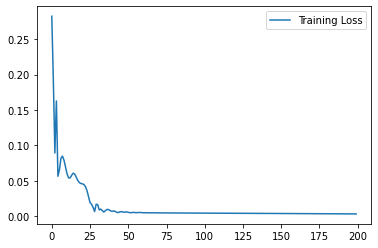

In [187]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [188]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 57.37 RMSE
Test Score: 77.76 RMSE


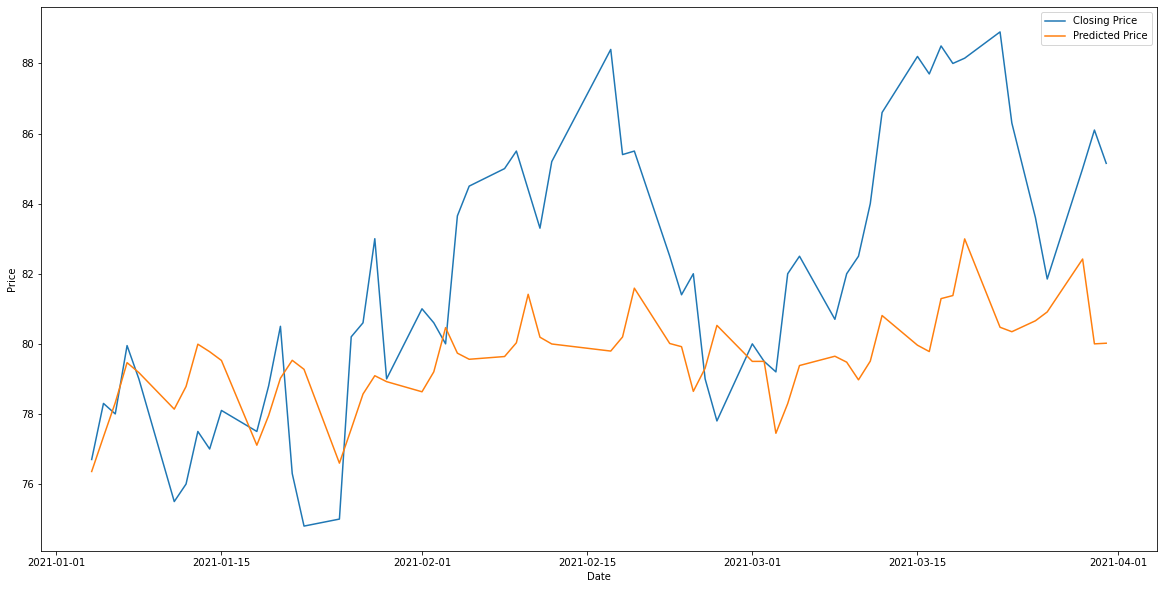

In [189]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Monthly